In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.getcwd()

#change working directory
os.chdir('F:\\FISH')
os.getcwd()

'F:\\FISH'

In [2]:
colnames = ['Chromosome', 'Start', 'End', 'Name', 'Sequence', 'Tot_hits', 'GC', 'Tm']
phase1 = "/FISH/MYC_SE_R/MYC_SE_R_hg38_phase1.bed"
phase1 = pd.read_csv(phase1, names=colnames, sep='\t', header=None)
phase1["Sequence"] = phase1["Sequence"].str.upper()

In [3]:
colnames2 = ['Chromosome', 'Start', 'End', 'Name', '20nt_hits', 'Align', 'Chromosome_targets', 'Mismatches', 'html']
phase2 = "/FISH/MYC_SE_R/MYC_SE_R_hg38_phase2.bed"
phase2 = pd.read_csv(phase2, names=colnames2, sep='\t', header=None)
phase2 = phase2.drop(columns=['html'])

In [4]:
# Merge pahse1 and phase2 on the names (by setting them as index)
# inner join only keeps names that are in both data frames
df = phase2.set_index('Name').join(phase1.set_index('Name')[['Sequence','Tot_hits','GC', 'Tm']], how='inner')
df.reset_index(inplace=True)

In [5]:
# Remove sequences with too many hit over 20nt, STANDARD MAX 3
# Remove sequences with more than 1 target in chr8 (target chromosome)
# Remove targets on translocated chromosome

df = df[~df['Chromosome_targets'].str.contains("chr8\(")] 
df = df[~df['Chromosome_targets'].str.contains("chr3")]
df = df[~df['Chromosome_targets'].str.contains("chr3\(")]

df.reset_index(drop=True, inplace=True)

In [6]:
df_1000_3 = df.copy()
df_1000_3 = df_1000_3[(df_1000_3['Tot_hits']<1000)]
df_1000_3 = df_1000_3[df_1000_3['20nt_hits']<3]

df_1000_3.reset_index(drop=True, inplace=True)

In [7]:
#load data MYC_SE_R PaintSHOP
file2 = "/FISH/MYC_SE_R/MYC_SE_R_PaintSHOP_default.txt"
colnames2 = ["Chromosome", "Start", "End", "Sequence", "Tm", "On Target", "Off Target", "Repeat Seq", 
             "Prob","Max Kmer", "Probe Strand", "Target"]
df_2 = pd.read_table(file2, names = colnames2, sep='\t')

In [8]:
def coverage(dt,start,end):
    array_T=[]
    
    a_start = dt['Start']
    a_end = dt['End']
    a = list(zip(a_start,a_end))
    
    for pos in range(start,end+1,1):
        for i in a:
            if (pos >= i[0] and pos <= i[1]):
                array_T.append(pos)
                break
    
    coverage = len(array_T)/(end-start+1)*100
    return coverage

coverage(df,129564054,129569054)

79.50409918016396

Text(0.5, 1.0, 'MYC_SE_R')

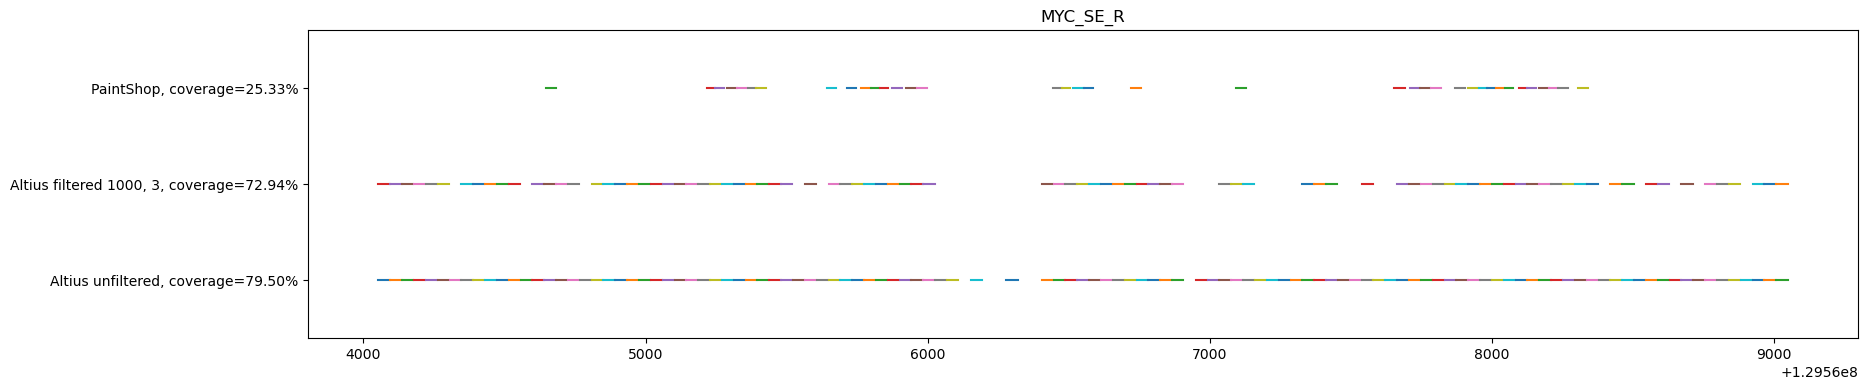

In [9]:
#plot for Altius unfiltered
y_pos = 1
fig, ax = plt.subplots(figsize=(20,4))
for start, end in zip(phase2.Start, phase2.End):
    ax.plot([start, end], [y_pos, y_pos])
    
#plot for Altius filtered 1000 3
y_pos = 2
for start, end in zip(df_1000_3.Start, df_1000_3.End):
    ax.plot([start, end], [y_pos, y_pos])
    
#plot for PaintSHOP
y_pos = 3
for start, end in zip(df_2.Start, df_2.End):
    ax.plot([start, end], [y_pos, y_pos])
    

# bigger margin in y
ax.margins(y=0.3)

ax.set_yticks([1,2,3])
plt.rc('ytick', labelsize=15)
ax.set_yticklabels(['Altius unfiltered, coverage=79.50%', 'Altius filtered 1000, 3, coverage=72.94%', 'PaintShop, coverage=25.33%'])
ax.set_title('MYC_SE_R')

In [10]:
len(df_1000_3), len(df)

(89, 97)